This lab aims to illustrate the rise in CO2 emmissions of the top 10 countries that produce the most emmisions. The source of data set comes from https://ourworldindata.org/co2-and-other-greenhouse-gas-emissions by Our World in Data in December 2022. 

## Imports

The following code brings relevant data from outside sources into the file that the notebook can operate on.

In [42]:
# Import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn is a data visualization library built on matplotlib
import seaborn as sns 

# set the plotting style 
sns.set_style("whitegrid")

# Plot missing values
import missingno as msno

## Lab introduction

Use the greenhouse gas emission data set owid-co2-data.csv from Our World in Data to describe how the emission levels of the current top 10 CO2 emitters have changed over the last 50 years (1971 - 2020). 



## Import and set up the data set

##### $\rightarrow$ Use Pandas to load the file `owid-co2-data.csv` from https://github.com/owid/co2-data as a `DataFrame`. Name the `DataFrame` `df`.

##### Solution

The following code identifies the data frame as df to load the files that were previously imported.

In [43]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv')

Consult the [codebook](https://github.com/owid/co2-data/blob/master/owid-co2-codebook.csv) to see the description of each column.



##### $\rightarrow$ Select the rows corresponding to individual countries 

The `country` column of the data set contains some values that are groups of countries. We will remove these observations from the data set.

In [44]:
non_countries = ['Africa', 'Africa (GCP)', 'Asia', 'Asia (GCP)', 'Asia (excl. China and India)', 'Central America (GCP)',
                  'EU-27', 'Europe', 'Europe (excl. EU-27)', 'European Union (27) (GCP)', 'Europe (GCP)',
                  'Europe (excl. EU-28)', 'European Union (27)', 
                  'European Union (28)', 'French Equatorial Africa', 
                  'French Guiana', 'French Polynesia', 'French West Africa',
                  'High-income countries', 'International transport', 
                  'Low-income countries', 'Lower-middle-income countries', 'Mayotte', 'Middle East (GCP)',
                  'Non-OECD (GCP)',
                  'North America',  'North America (excl. USA)', 'North America (GCP)',
                  'Oceania (GCP)', 'OECD (GCP)', 
                  'Panama Canal Zone','South America', 'South America (GCP)', 'Upper-middle-income countries', 
                  'World']

Remove the rows corresponding to the non-countries.

The following code aims to remove the non-countries from the data set.

In [5]:
df=df.loc[df['country'].isin(non_countries)==False]

Now the non-countries are removed from the data set.

## Explore the data set

##### $\rightarrow$ Display the head of the data frame

##### Solution

The following code is intened to display the first few rows of the data set.

In [6]:
df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN


What is displayed is the first 5 rows of the data set. Countries are arranged in alphabetical order in ascending years. 

##### $\rightarrow$ Use the `info` method further explore the data.
1.  Are there any columns where the data type is obviously incorrect? For example, is there a variable that should be a number, but is coded as a string?
2.  Do any of the columns have missing (null) values?

We want to display info from the data frame.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39638 entries, 0 to 46522
Data columns (total 74 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    39638 non-null  object 
 1   year                                       39638 non-null  int64  
 2   iso_code                                   39251 non-null  object 
 3   population                                 36053 non-null  float64
 4   gdp                                        14535 non-null  float64
 5   cement_co2                                 20333 non-null  float64
 6   cement_co2_per_capita                      19018 non-null  float64
 7   co2                                        24464 non-null  float64
 8   co2_growth_abs                             23971 non-null  float64
 9   co2_growth_prct                            21484 non-null  float64
 10  co2_including_luc     

Here we can see the categories of data, and how the data is stored. Float64 displays numbers as decimals, int64 displays numbers as intigers, object displays data as words.

##### Solution

# Answers
# 1. Population is stored as a float but it would be better to store it as an intiger because you can't have a decimal count of a person.

# 2. None of the columns have null values.

In [8]:
df.isna()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,False,False,False,False,True,True,True,True,True,True,...,True,True,True,False,True,True,True,True,True,True
1,False,False,False,False,True,True,True,True,True,True,...,True,True,True,False,True,True,True,True,True,True
2,False,False,False,False,True,True,True,True,True,True,...,True,True,True,False,True,True,True,True,True,True
3,False,False,False,False,True,True,True,True,True,True,...,True,True,True,False,True,True,True,True,True,True
4,False,False,False,False,True,True,True,True,True,True,...,True,True,True,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46518,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
46519,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
46520,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
46521,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,True,True,True,False,False


In [9]:
df.isna().sum()

country                         0
year                            0
iso_code                      387
population                   3585
gdp                         25103
                            ...  
share_global_other_co2      38018
total_ghg                   33819
total_ghg_excluding_lucf    33819
trade_co2                   35908
trade_co2_share             35909
Length: 74, dtype: int64

##### $\rightarrow$ What years are present in the data set?

##### Solution

We want to see what the data set contains. The code df opens the data frame.

In [10]:
df

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_other_co2,share_global_flaring_co2,share_global_gas_co2,share_global_luc_co2,share_global_oil_co2,share_global_other_co2,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.121,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3769828.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.118,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3787706.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.116,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3806634.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.115,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3825655.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.114,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46518,Zimbabwe,2017,ZWE,14751101.0,2.194784e+10,0.469,0.032,9.596,-0.937,-8.899,...,NaN,0.0,0.0,0.219,0.026,NaN,115.59,28.30,0.910,9.486
46519,Zimbabwe,2018,ZWE,15052191.0,2.271535e+10,0.558,0.037,11.795,2.199,22.920,...,NaN,0.0,0.0,0.211,0.033,NaN,118.22,30.83,0.771,6.537
46520,Zimbabwe,2019,ZWE,15354606.0,NaN,0.570,0.037,11.115,-0.681,-5.772,...,NaN,0.0,0.0,0.183,0.030,NaN,117.96,30.53,0.978,8.795
46521,Zimbabwe,2020,ZWE,15669663.0,NaN,0.570,0.036,10.608,-0.507,-4.559,...,NaN,0.0,0.0,0.194,0.030,NaN,NaN,NaN,1.006,9.481


Here we can see all the data of countries listed in alphabetical order, in years from 1850 to 2021.

#Answer
#The years present are 1850 to 2021

[link text](https://)## Analysis of top emissions in 2020

##### $\rightarrow$ Find the top 10 emitters of total CO$_2$ in 2020.



We want to define the CO2 data set in the data frame

In [24]:
df_co2 = df[['country', 'year', 'co2']]

CO2 is now defined and data of countries, the years and CO2 emmissions can now be operated on by the program.

In [25]:
df_co2.head()

,country,year,co2
0,Afghanistan,1850,NaN
1,Afghanistan,1851,NaN
2,Afghanistan,1852,NaN
3,Afghanistan,1853,NaN
4,Afghanistan,1854,NaN


We can see the first 5 rows of CO2 emmisisons in ascending years 

The following code sorts data into specific categories to display specific information we want to see.

In [28]:
df_co2.sort_values(by = ['year','co2',], ascending = False)

,country,year,co2
8990,China,2021,11472.368
44222,United States,2021,5007.336
20137,India,2021,2709.684
35054,Russia,2021,1755.547
21757,Japan,2021,1067.398
...,...,...,...
32909,Papua New Guinea,1750,0.000
34435,Reunion,1750,0.000
37069,Sierra Leone,1750,0.000
37341,Singapore,1750,0.000


##### Solution

#Answer
#If we expand the interactive table, we can look through the data set and fins that the Top 10 emitters of CO2 in 2020 are China, the United States, India, Russia, Japan, Iran, Saudi Arabia, Germany, Indonesia, South Korea.

##### $\rightarrow$ Make a histogram of total CO$_2$ emissions in 2020. Make the plot on a density scale.

##### Solution

following code tells the prograpm what to plot, how large the plot is, the data to be displayed on it, colors, et.

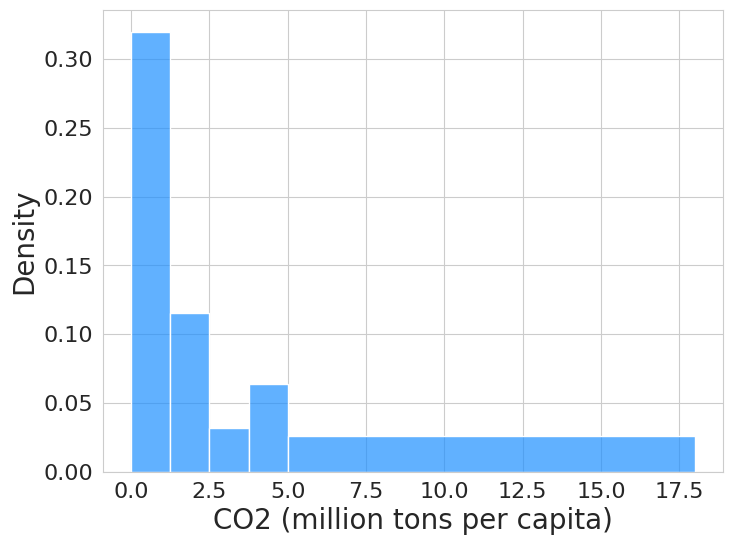

In [16]:
# Set the figure size
plt.figure(figsize = (8,6))

# Produce the histogram
sns.histplot(data = df[df['year'] == 2020], x = 'co2', 
             bins = np.r_[np.linspace(0, 5, 5), 18], color = 'dodgerblue', alpha = 0.7, stat = 'density')

# Label the axes
plt.ylabel('Density',fontsize = 20)
plt.xlabel('CO2 (million tons per capita)',fontsize = 20)

# Set sizes of tick labels
plt.tick_params(labelsize = 16);

Here we see a histogram that displays the counts of countires that produce certain emission levels of CO2 in densities. 

##### $\rightarrow$ Make a boxplot of total CO$_2$ emissions in 2020. Add a strip plot on top of the boxplot.

##### Solution

The following code creates a boxplot with a strip plot layed over it to illustrate distributions of data points. 

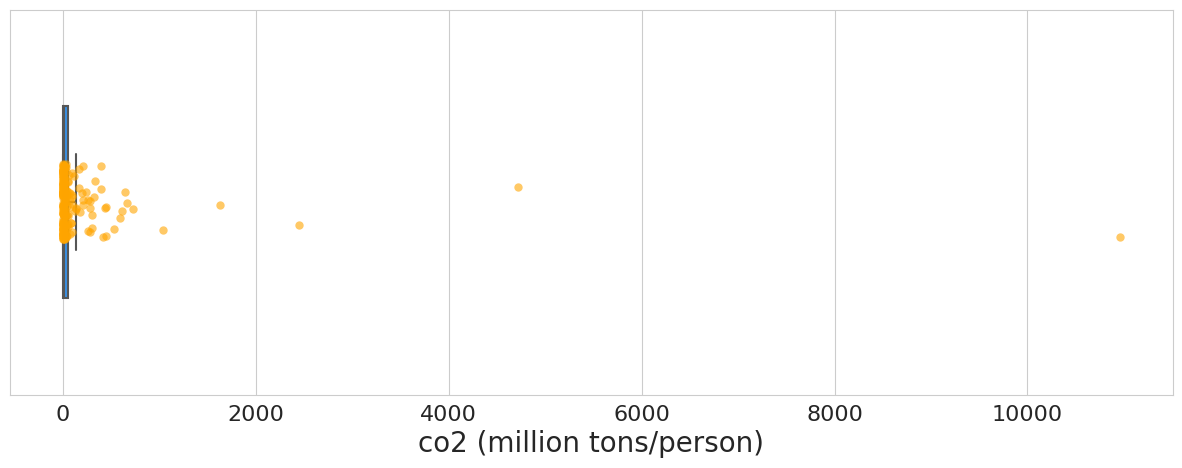

In [18]:
# Figure size
plt.figure(figsize = (15,5))

# Use Seaborn to make the boxplot, but don't show outliers (fliersize = 0)
sns.boxplot(data = df[df['year'] == 2020], x = 'co2', color = 'dodgerblue', width = 0.5, fliersize = 0)

# Use Seaborn to make the swarm plot
sns.stripplot(data = df[df['year'] == 2020], x = 'co2', color = 'orange', size = 6, alpha = 0.6)

# Label axes
plt.xlabel('co2 (million tons/person)', fontsize = 20)

# Set sizes of tick labels
plt.tick_params(labelsize = 16);

Here we are able to identify upper and lower quartiles, as well as the outliers. 

##### $\rightarrow$ Are the CO$_2$ emissions of the top 10 emitters in 2020 outliers in the distribution?

##### Solution

#Answer 
#Yes. It appears that all the top 10 emmitters in 2020 are outliers in the distribution.

## Emission trend over time

##### $\rightarrow$ Is the data set missing any CO$_2$ emission values for the top 10 emitters in 2020 over the years 1971 to 2020?

We want to see if the data from 1971 to 2020 is complete for the top 10 emitters, this code displays any countries that have missing data in certain years.

In [32]:
df_co2.sort_values(by=['co2', 'year'], ascending=False, na_position='first')

,country,year,co2
787,Aland Islands,2021,NaN
1303,American Samoa,2021,NaN
15130,Falkland Islands,2021,NaN
18099,Guernsey,2021,NaN
21069,Isle of Man,2021,NaN
...,...,...,...
32909,Papua New Guinea,1750,0.0
34435,Reunion,1750,0.0
37069,Sierra Leone,1750,0.0
37341,Singapore,1750,0.0


Data displayed shows countries that have no recorded date in certain years in descending order.

##### Solution

#Answer 
#No, the top 10 emmiters of Co2 in 2020 have emmisison values from 1971 though to 2020.

##### $\rightarrow$ Plot the time plot of the total CO$_2$ emissions from 1971 to 2020 for the top 10 emitters in 2020.

##### Solution

Following code creates a line plot, and speficiations such as countries, respective CO2 emission levels per respective year, and axis names are given. 

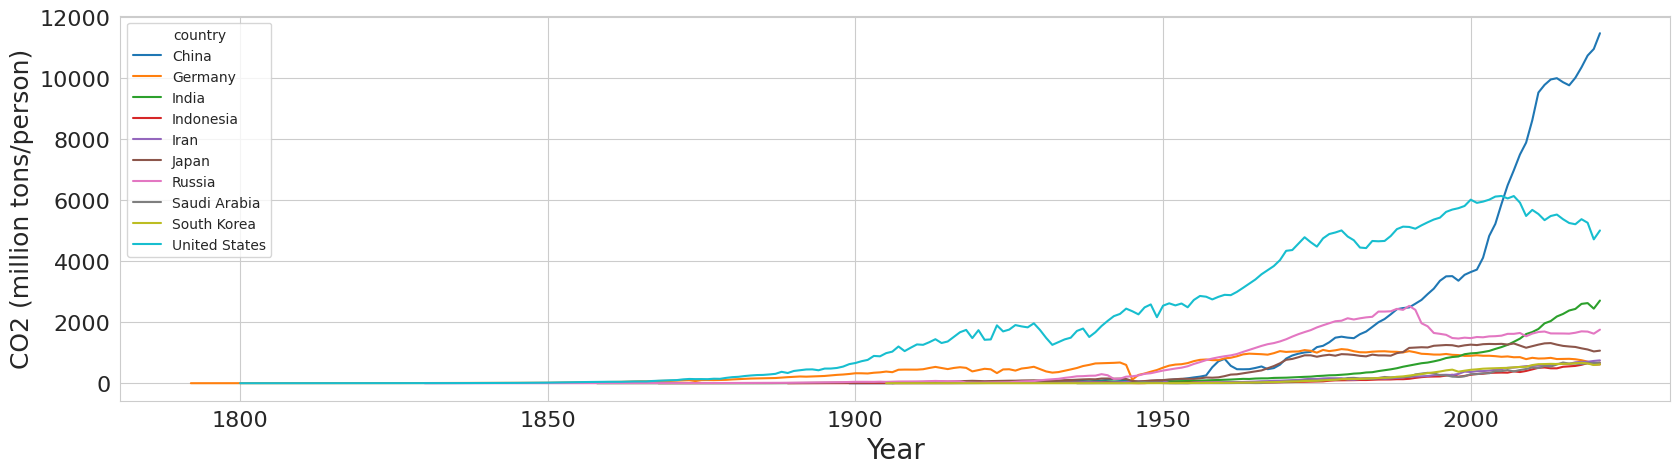

In [41]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df[df['country'].isin(['China', 'United States', 'India', 'Russia', 'Japan', 'Iran', 'Saudi Arabia', 'Germany', 'Indonesia', 'South Korea'])], x='year', y='co2', hue='country')

plt.xlabel('Year', fontsize = 20)
plt.ylabel('CO2 (million tons/person)', fontsize = 18)

# Set sizes of tick labels
plt.tick_params(labelsize = 16);

We see data displayed throughout the years that are recorded in the data frame,, but we are only interested in the years 1971 to 2020.


##### $\rightarrow$ Again, plot the time plot of the total CO$_2$ emissions from 1971 to 2020 for the top 10 emitters in 2020, but now also include a plot of the mean total CO$_2$ emissions over all countries on the same plot.

##### Solution

We now want to compare the line graphs of each country to the line graph of the mean of all countries, the following code allows us to see this.

<ipython-input-46-dc951876aa32>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(data = df.groupby('year').mean(),


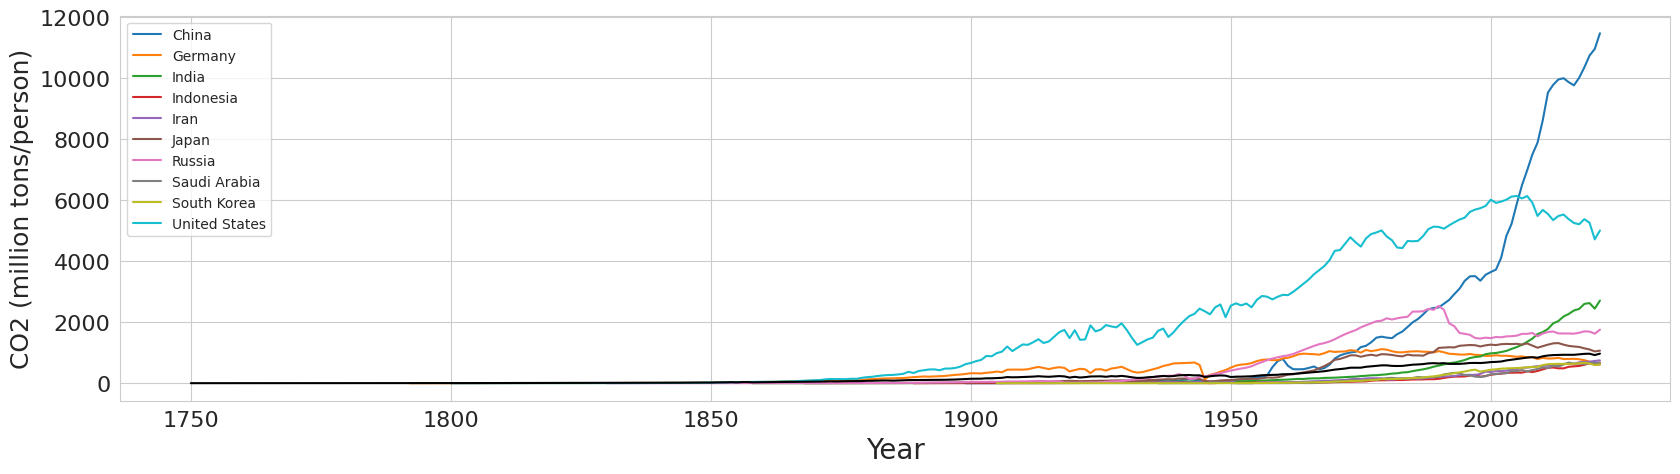

In [46]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df[df['country'].isin(['China', 'United States', 'India', 'Russia', 'Japan', 'Iran', 'Saudi Arabia', 'Germany', 'Indonesia', 'South Korea'])], x='year', y='co2', hue='country')

plt.xlabel('Year', fontsize = 20)
plt.ylabel('CO2 (million tons/person)', fontsize = 18)

sns.lineplot(data = df.groupby('year').mean(),
             x='year',
             y='co2',
             color='k')

# Set sizes of tick labels
plt.tick_params(labelsize = 16);

The mean line plot is shown in black. 

##### $\rightarrow$ Given the large difference between the smallest and largest values, it can help to plot the results on a log scale. Produce the plot of the top 10 emitters and the mean with CO$_2$ emissions on a log scale.

<ipython-input-47-57d7256206e6>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(data = df.groupby('year').mean(),


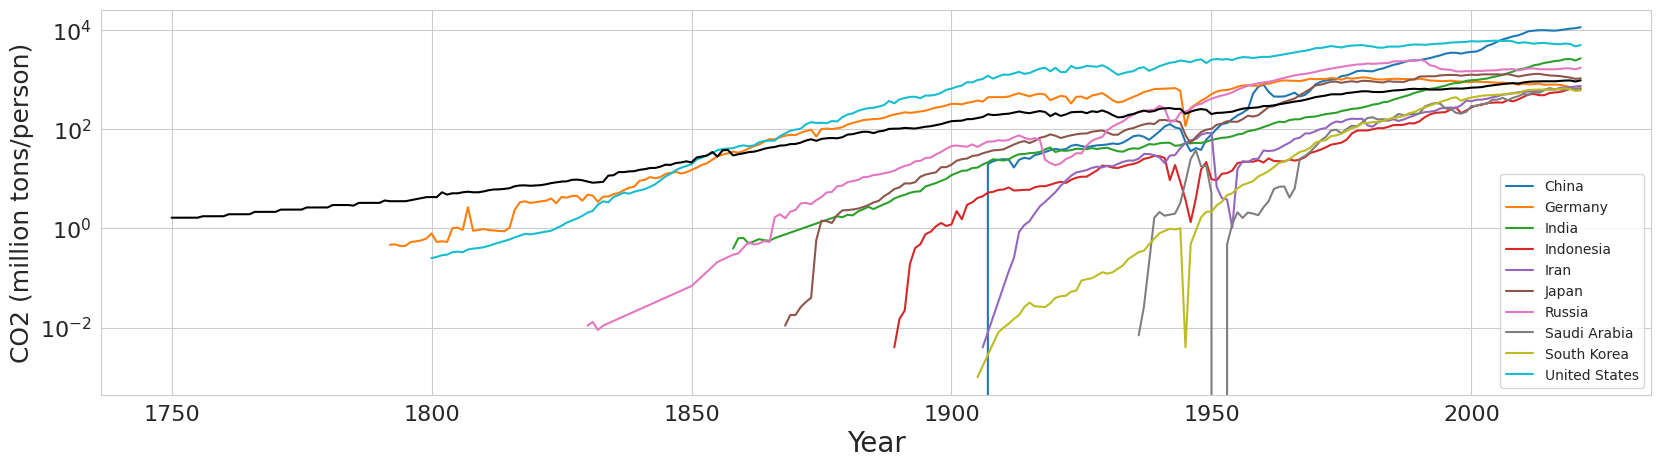

In [47]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df[df['country'].isin(['China', 'United States', 'India', 'Russia', 'Japan', 'Iran', 'Saudi Arabia', 'Germany', 'Indonesia', 'South Korea'])], x='year', y='co2', hue='country')

plt.xlabel('Year', fontsize = 20)
plt.ylabel('CO2 (million tons/person)', fontsize = 18)
plt.yscale('log')

sns.lineplot(data = df.groupby('year').mean(),
             x='year',
             y='co2',
             color='k')

# Set sizes of tick labels
plt.tick_params(labelsize = 16);

Here we can see where CO2 emissions drop in certain countries and are provided with a deferent view of the data.  

##### Solution

##### $\rightarrow$ Comment on the trend in CO$_2$ emissions from these countries over the last 50 years.

##### Solution

#Answer
#Overall, CO2 emissions from these countries have increased exponentially over the last 50 years.